<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Python: Programação Funcional
Caderno de **Aula**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Função lambda;</li>
  <li>Função map;</li>
  <li>Função filter;</li>
  <li>Função reduce.</li>
</ol>

---

# **Aulas**

## 0\. Paradigmas de Programação

Estilos de programação.

1.   Imperativa;
2.   Funcional;
3.   Orientada a objetos.



O Python é uma linguagem [multi-paradigma](https://en.wikipedia.org/wiki/Python_(programming_language)).



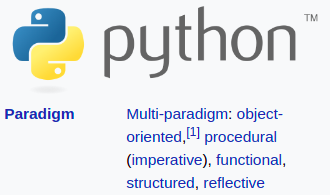

Este módulo é sobre **programação funcional**, que é o estilo que busca manipular dados com muitas e pequenas funções.

## 1\. Função lambda

### **1.1. Definição** 

Função anônima (sem nome) com bloco de código super enxuto e que pode ser salva em uma variável. Em geral é utilizada com outros métodos funcionais como `map`, `filter`, e `reduce`.

```python
variavel = lambda params: expressão
```

**Exemplo**: Função `lambda` para extrair provedor de e-mail.

In [ ]:
extrair_provedor_email = lambda email: email.split(sep='@')[-1]

In [ ]:
email = 'andre.perez@gmail.com'
print(email)

provedor_email = extrair_provedor_email(email)
print(provedor_email)

andre.perez@gmail.com
gmail.com


---

In [ ]:
cidade_estado = 'Santa Maria, Rio Grande do Sul' 

extrai_cidade = lambda cidade_estado: cidade_estado.split(sep=', ')[0]
extrai_estado = lambda cidade_estado: cidade_estado.split(sep=', ')[1]
print(extrai_cidade(cidade_estado))
print(extrai_estado(cidade_estado))

Santa Maria
Rio Grande do Sul


**Exemplo**: Função `lamba` com estruturas condicionais.

In [ ]:
numero_e_par = lambda numero: True if numero % 2 == 0 else False

In [ ]:
numeros = range(0, 10)

In [ ]:
for numero in numeros:
  if numero_e_par(numero) == True:
    print(f'O número {numero} é par!')

O número 0 é par!
O número 2 é par!
O número 4 é par!
O número 6 é par!
O número 8 é par!


### **1.2. Função de alta ordem** 

São funções que recebem outras funções para parâmetro ou retornam outra função.

**Exemplo**: Juros compostos dinâmico.

 - Definição.

In [ ]:
def retorno(juros: float):
  return lambda investimento: investimento * (1 + juros)

 - Instanciação.

In [ ]:
retorno_5_porcento = retorno(juros=0.05)
retorno_10_porcento = retorno(juros=0.10)

In [ ]:
valor_final = retorno_5_porcento(investimento=1000)
print(valor_final)

valor_final = retorno_10_porcento(investimento=1000)
print(valor_final)

1050.0
1100.0


 - Uso.

In [ ]:
anos = 10
valor_inicial = 1000
valor_final = valor_inicial

for ano in range(1, anos+1):
  valor_final = retorno_5_porcento(investimento=valor_final)

valor_final = round(valor_final, 2)
print(valor_final)

1628.89


In [ ]:
anos = 10
valor_inicial = 1000
valor_final = valor_inicial

for ano in range(1, anos+1):
  valor_final = retorno_10_porcento(investimento=valor_final)

valor_final = round(valor_final, 2)
print(valor_final)

2593.74


---

**Exemplo**: a função abaixo contempla uma função para retornar a área de uma figura geométrica com lados ***a*** e retorna uma funação *lambda* para calcular o volume (com base em uma cota ***z***). - by VRO.

---


In [ ]:
def area(a: float):
  return lambda z: z*a*a

In [ ]:
a_equal_5 = area(5)
a_equal_20 = area(20)

In [ ]:
volume_z_equal_10 = a_equal_5(z=10)
print(volume_z_equal_10)

volume_z_equal_50 = a_equal_20(z=50)
print(volume_z_equal_50) 

250
20000


## 2\. Função map

### **2.1. Definição** 

Aplica uma função em todos os elementos de uma coleção (`list`, `dict`, etc.) e retorna **todos** os elementos transformados.

```python
variavel = map(função, coleção)
```

In [ ]:
numeros = [1, 2, 3]

numeros_ao_cubo = map(lambda num: num ** 3, numeros)

print(list(numeros_ao_cubo))

[1, 8, 27]


In [ ]:
x = [0, 50, 100, 150, 200, 250, 300, 350,
     400, 450, 500, 550, 600, 650, 700]

x_ao_quadrado = map(lambda xi: xi**2, x)
print(list(x_ao_quadrado))

[0, 2500, 10000, 22500, 40000, 62500, 90000, 122500, 160000, 202500, 250000, 302500, 360000, 422500, 490000]


### **2.2. Função de alta ordem** 

**Exemplo**: Função `lambda` para extrair provedor de e-mail (1 parâmetro).

In [ ]:
emails = ['andre.perez@gmail.com', 'andre.perez@live.com', 'andre.perez@yahoo.com']
extrair_provedor_email = lambda email: email.split(sep='@')[-1]

In [ ]:
provedores = []
for email in emails:
  provedor = extrair_provedor_email(email)
  provedores.append(provedor)

print(provedores)

['gmail.com', 'live.com', 'yahoo.com']


In [ ]:
provedores = map(extrair_provedor_email, emails)
print(provedores)

In [ ]:
provedores = list(map(extrair_provedor_email, emails))
print(provedores)

['gmail.com', 'live.com', 'yahoo.com']


In [ ]:
provedores = map(lambda email: email.split(sep='@')[-1], emails)
...
print(list(provedores))

['gmail.com', 'live.com', 'yahoo.com']


- **Exemplo**: Investimento (Mais de 1 parâmetros).

In [ ]:
anos = [10, 10, 10]
taxas_juros = [0.05, 0.10, 0.15]
valores_iniciais = [1000, 1000, 1000]

def retorno(valor_inicial: float, taxa_juros: float, anos: int) -> float:
  valor_final = valor_inicial
  for ano in range(1,anos+1):
    valor_final = valor_final * (1+taxa_juros)
  return round(valor_final, 2)

cenarios = list(map(retorno, valores_iniciais, taxas_juros, anos))
print(cenarios)

[1628.89, 2593.74, 4045.56]


--- 
**by VRO**:

Criar um função para retornar a **Resolutividade Interna** (equação abaixo) de uma equipe de **Engenharia Clínica**, tendo como base dados sobre as **Ordens de Serviço (OS)** para *manutenção corretiva* de equipamentos médico-hospitalares durante 10 meses. Considere o cenário de que o número de OS abertas é um número médio e constante e que, em todas as OS concluídas, a manutenção foi realizada com sucesso.

\begin{equation}
Resolutividade \ Interna \ (\%) = \frac{OS_{concluidas}}{OS_{abertas}}
\end{equation}

---




In [ ]:
OS_abertas = [50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
OS_concluidas = [40, 45, 30, 32, 42, 48, 39, 35, 22, 41]
Mes = ['Mês 1', 'Mês 2', 'Mês 3', 'Mês 4', 'Mês 5',
       'Mês 6', 'Mês 7', 'Mês 8 ', 'Mês 9', 'Mês 10']

def Resolutividade(qtd_OS_abertas: float, qtd_OS_concluidas: float) -> float:
  for OS_concluida in OS_concluidas:
    qtd_OS_concluida = qtd_OS_concluidas
    Resolutividade = qtd_OS_concluidas / qtd_OS_abertas * 100
    return round(Resolutividade, 2)

Resolutividades_mensais = list(map(Resolutividade, OS_abertas, OS_concluidas))

for Resolutividade_mensal in Resolutividades_mensais:
  print(f'Resolutividade Interna: {Resolutividade_mensal}%' )

Resolutividade Interna: 80.0%
Resolutividade Interna: 90.0%
Resolutividade Interna: 60.0%
Resolutividade Interna: 64.0%
Resolutividade Interna: 84.0%
Resolutividade Interna: 96.0%
Resolutividade Interna: 78.0%
Resolutividade Interna: 70.0%
Resolutividade Interna: 44.0%
Resolutividade Interna: 82.0%


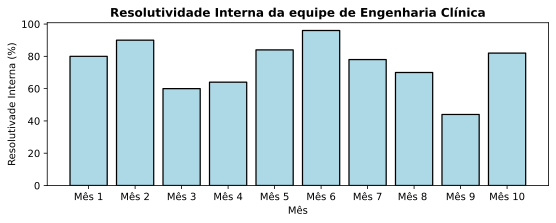

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
display.set_matplotlib_formats('svg')

plt.figure(figsize=(9,3))
plt.title("Resolutividade Interna da equipe de Engenharia Clínica",
          weight='bold', fontsize=12)
plt.xlabel('Mês', fontsize=10)
plt.ylabel('Resolutivade Interna (%)', fontsize=10)
plt.bar(Mes, Resolutividades_mensais,color='lightblue',edgecolor='k',lw=1.25)
#plt.axhline(mean(Resolutividades_mensais),color='k',lw=1.05, ls='dashed')
#plt.text(1.70,78,'Média',weight='bold')
plt.show()

## 3\. Função filter

### **3.1. Definição** 

Aplica uma função lógica (que retorna um booleano) em todos os elementos de uma coleção (`list`, `dict`, etc.) e retorna **apenas** aqueles que resultaram em verdadeiro (`True`).

```python
variavel = filter(função, coleção)
```

In [ ]:
numeros = [1, 2, 3]

numeros_par = filter(lambda num: num % 2 == 0, numeros)

print(list(numeros_par))

In [ ]:
xi = [1, 7, 14, 22, 21, 25, 35, 38, 40]

multiplo_de_7 = filter(lambda xj: (xj % 7 == 0) & (xj % 2 !=0) , xi)
print(list(multiplo_de_7))

### **3.2. Função de alta ordem** 

**Exemplo**: Função `lambda` para extrair provedor de e-mail.

In [ ]:
emails = ['andre.perez@gmail.com', 'andre.perez@live.com', 'andre.perez@yahoo.com']
provedor_da_google = lambda email: 'gmail' in email

In [ ]:
emails_google = []
for email in emails:
  if provedor_da_google(email) == True:
    emails_google.append(email)

print(emails_google)

['andre.perez@gmail.com']


In [ ]:
emails_google = filter(provedor_da_google, emails)
print(emails_google)

In [ ]:
emails_google = list(filter(provedor_da_google, emails))
print(emails_google)

In [ ]:
emails_google = filter(lambda email: 'gmail' in email, emails)
...
print(list(emails_google))

---
**by VRO**:

Criar um funação filter para retornar uma lista de valores pares e múltiplos de 7, a partir de uma coleção de 15 elementos.

In [ ]:
n = [1, 5, 7, 14, 12, 16, 21, 28, 35, 42, 54, 56, 70, 75, 72]
multiplo_7_par = list(filter(lambda xt: (xt % 7 ==0) & (xt % 2 == 0), n))
print(multiplo_7_par)

[14, 28, 42, 56, 70]


## 4\. Função reduce

### **4.1. Definição** 

Aplica uma função a todos os elemento de uma coleção, dois a dois, e retorna **apenas** um elemento.

```python
variavel = reduce(função, coleção)
```

In [ ]:
numeros = [1, 2, 3]

In [ ]:
from functools import reduce

soma = reduce(lambda x, y: x + y, numeros)
print(soma)

6


### **4.2. Função de alta ordem** 

**Exemplo**: Encontrar maior número em uma lista.

In [ ]:
def maior_entre(primeiro: int, segundo: int) -> int:
  return primeiro if primeiro >= segundo else segundo

primeiro = 11
segundo = 11

print(maior_entre(primeiro=primeiro, segundo=segundo))

11


In [ ]:
from random import random

print(random())

0.5070517149729191


**Nota**: O *underline* signifia que não estamos interessados no primeiro elemento.

In [ ]:
from random import random

numeros = [round(100 * random()) for _ in range(0, 100)]
print(numeros)

[6, 90, 79, 38, 96, 48, 61, 33, 6, 34, 72, 99, 92, 26, 33, 99, 58, 17, 19, 86, 6, 30, 38, 6, 76, 99, 36, 6, 5, 57, 60, 7, 76, 55, 58, 9, 12, 61, 83, 11, 58, 50, 59, 58, 43, 37, 75, 10, 43, 53, 43, 37, 1, 37, 60, 14, 91, 89, 16, 96, 3, 1, 28, 0, 23, 40, 1, 19, 82, 75, 83, 87, 35, 12, 99, 25, 85, 3, 67, 43, 23, 20, 91, 79, 50, 79, 59, 35, 81, 44, 19, 9, 31, 45, 68, 90, 46, 66, 29, 58]


In [ ]:
maior_numero = reduce(maior_entre, numeros)
print(maior_numero)

In [ ]:
maior_numero = reduce(lambda primeiro, segundo: primeiro if primeiro >= segundo else segundo, numeros)
print(maior_numero)

Text(0, 0.5, 'x')

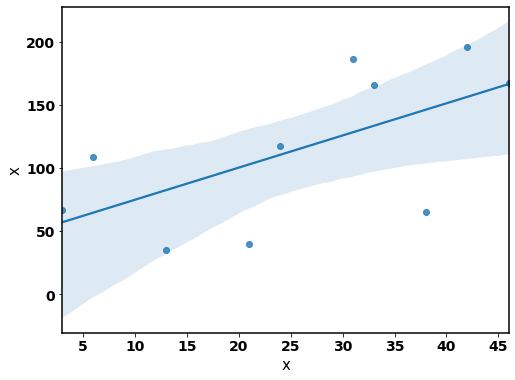

In [ ]:
import pandas as pd
import seaborn as sns
from pylab import *
rc('axes', lw=1.5)
plt.rcParams['axes.facecolor']='white'

x = [round(50 * random()) for _ in range(0,10)]
y = [round(200 * random()) for _ in range(40,50)]  
data = {'xi': x, 'yi': y}
dados = pd.DataFrame(data)
plt.figure(figsize=(8,6))
#plt.plot(x,y,'o', color = 'k')
sns.regplot(x='xi',y='yi',data=dados)
plt.xticks(weight='bold',fontsize=14)
plt.yticks(weight='bold',fontsize=14)
plt.xlabel('x',fontsize=15)
plt.ylabel('x',fontsize=15)

### **4.3. Compossibilidade** 

**Exemplo**: Combinação de métodos funcionais.

In [ ]:
from random import random

numeros = [round(100 * random()) for _ in range(0, 100)]
print(numeros)

[93, 25, 80, 71, 29, 49, 38, 42, 45, 54, 95, 85, 23, 19, 75, 72, 87, 83, 16, 7, 44, 4, 50, 53, 25, 78, 55, 19, 65, 59, 74, 14, 70, 10, 47, 84, 52, 63, 54, 15, 68, 68, 24, 96, 90, 75, 10, 98, 2, 92, 62, 10, 52, 46, 64, 44, 41, 1, 70, 95, 59, 45, 75, 71, 83, 70, 34, 16, 80, 96, 57, 33, 5, 67, 23, 23, 38, 62, 56, 66, 17, 49, 25, 29, 18, 91, 28, 99, 31, 47, 89, 15, 62, 70, 15, 85, 36, 35, 44, 93]


 - Eleve os números ao quadrado.

In [ ]:
numeros_ao_quadrado = map(lambda numero: numero ** 2, numeros)

 - Filtra os números ímpares.

In [ ]:
numeros_impares = filter(lambda numero: numero % 2 != 0, numeros_ao_quadrado)

 - Soma todos os números.

In [ ]:
soma_numeros = reduce(lambda x, y: x + y, numeros_impares)
print(soma_numeros)

177964


 - Todos os métodos de uma vez.

In [ ]:
soma_numeros = reduce(lambda x, y: x + y, filter(lambda numero: numero % 2 != 0, map(lambda numero: numero ** 2, numeros)))
print(soma_numeros)

177964
